Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4486 - loss: 1.3149 - val_accuracy: 0.5714 - val_loss: 1.2427
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3206 - loss: 1.5069 - val_accuracy: 0.5714 - val_loss: 1.1683
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3145 - loss: 1.2627 - val_accuracy: 0.5714 - val_loss: 1.1070
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3576 - loss: 1.2208 - val_accuracy: 0.6190 - val_loss: 1.0568
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3491 - loss: 1.2103 - val_accuracy: 0.6190 - val_loss: 1.0135
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4753 - loss: 1.0927 - val_accuracy: 0.5714 - val_loss: 0.9756
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5260 - loss: 1.0732 - val_accuracy: 0.5714 - val_loss: 0.9415
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5546 - loss: 0.9537 - val_accuracy: 0.6190 

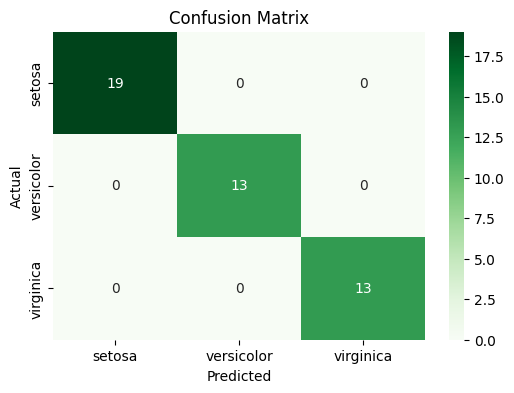

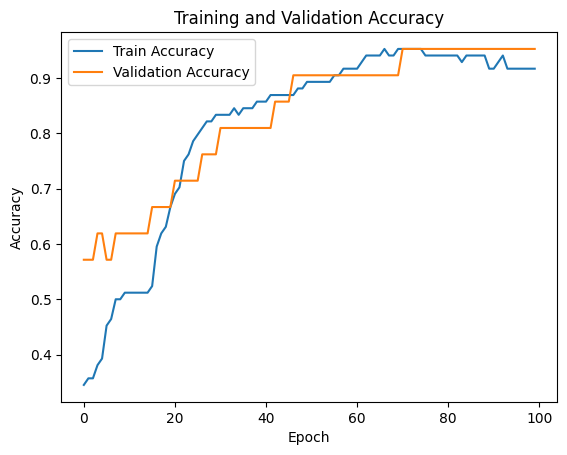

In [ ]:
# Neural Network using TensorFlow / Keras Sequential API

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: One-hot encode labels
y_cat = to_categorical(y)

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build Sequential model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # 4 features in Iris dataset
    Dense(10, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')     # 3 output classes
])

# Step 6: Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=8,
                    validation_split=0.2,
                    verbose=1)

# Step 8: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Step 9: Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=iris.target_names))

# Step 10: Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 11: Plot accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()